In [221]:
import pandas as pd
import numpy as np
import nltk
from scipy.stats import multinomial
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import normalize
from math import log
from nltk import bigrams, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from afinn import Afinn
import seaborn as sns
import re

___

### <span style="color:blue"><b>Task 1: Data cleaning</b></span>

In [222]:
df_cnn = pd.read_csv(r"C:\Users\Enkhsaikhan\Final_paper_text_as_data\raw_data\cnn_articles.csv")
df_fox = pd.read_csv(r"C:\Users\Enkhsaikhan\Final_paper_text_as_data\raw_data\foxnews_articles.csv")

In [223]:
df_cnn

,title,date,body,link
0,The US economy expanded at the fastest pace in...,2025-12-23,An initial reading of third-quarter gross dome...,https://www.cnn.com/2025/12/23/economy/us-gdp-q3
1,"Inflation cooled in November to 2.7%, but econ...",2025-12-18,Inflation unexpectedly – and sharply – slowed ...,https://www.cnn.com/2025/12/18/economy/us-cpi-...
2,The No. 1 cause of America’s affordability pro...,2025-12-16,America’scost-of-living problemis simple math:...,https://www.cnn.com/2025/12/16/economy/afforda...
3,The solution to America’s affordability proble...,2025-12-15,The best way to fix Americans’ cost-of-living ...,https://www.cnn.com/2025/12/15/economy/afforda...
4,Analysis: How the White House is using mislead...,2025-12-11,"The year-over-yearinflation ratein January, th...",https://www.cnn.com/2025/12/11/politics/inflat...
...,...,...,...,...
2267,National insurance hike sets UK on path to rec...,2021-09-08,UK Prime Minister Boris Johnson’s plan tohike ...,https://www.cnn.com/2021/09/08/business/nation...
2268,President Biden wins global support for massiv...,2021-07-01,The United States has won international backin...,https://www.cnn.com/2021/07/01/economy/global-...
2269,Biden wants to set a global minimum tax. The G...,2021-06-04,The Biden administration’s ambitious plan to o...,https://www.cnn.com/2021/06/04/business/global...
2270,Biden wants to make the US more competitive. H...,2021-04-12,Editor’s Note:Garrett Watson is a senior polic...,https://www.cnn.com/2021/04/12/perspectives/bi...


In [224]:
df_fox

,url,headline,body,date
0,https://www.foxnews.com/politics/affordability...,Affordability: The issue that boosted Trump an...,O'Leary Ventures chairman Kevin O'Leary analyz...,12/27/2025
1,https://www.foxnews.com/politics/perception-vs...,‘Perception vs. reality’: Trump’s economy pick...,Unleash Prosperity co-founder Stephen Moore sa...,12/27/2025
2,https://www.foxnews.com/opinion/sec-turner-hom...,SEC TURNER: Homeownership is making a comeback...,Citizens Alliance CEO Cliff Maloney joins 'Sat...,12/26/2025
3,https://www.foxnews.com/opinion/im-new-virgini...,I’m the new Virginia governor and affordabilit...,O'Leary Ventures chairman Kevin O'Leary analyz...,12/26/2025
4,https://www.foxnews.com/tech/3d-printed-housin...,3D-printed housing project for student apartme...,A few hundred robots moved a building that cov...,12/24/2025
...,...,...,...,...
751,https://www.foxnews.com/media/dnc-chair-hopefu...,DNC chair hopeful Martin O’Malley says Dems wi...,Former Maryland governor and DNC chair nominee...,1/3/2025
752,https://www.foxnews.com/opinion/3-ways-trump-c...,3 ways Trump can deliver an economic 'golden a...,'Outnumbered' panelists discuss the possible e...,1/3/2025
753,https://www.foxnews.com/politics/trump-says-he...,Trump says he's not changed his mind on H-1B v...,Columnist David Marcus joins Fox & Friends to ...,1/2/2025
754,https://www.foxnews.com/opinion/democrats-paid...,Democrats paid the price for abandoning modera...,Fox News senior congressional correspondent Ch...,1/2/2025


In [225]:
#Renaming columns for concating 
df_fox = df_fox.rename(columns={"headline":"title"})
df_fox = df_fox.rename(columns={"url":"link"})

In [226]:
df_cnn["source"] = "CNN"
df_fox["source"] = "Fox"

In [227]:
df = pd.concat([df_cnn, df_fox], ignore_index=True)

In [228]:
#Removing articles before 2025 
df = df[df["date"]>="2025-01-01"]

646 articles from CNN and 756 articles from Fox news

In [229]:
df['source'].value_counts()

source
CNN    646
Fox    423
Name: count, dtype: int64

In [230]:
df

,title,date,body,link,source
0,The US economy expanded at the fastest pace in...,2025-12-23,An initial reading of third-quarter gross dome...,https://www.cnn.com/2025/12/23/economy/us-gdp-q3,CNN
1,"Inflation cooled in November to 2.7%, but econ...",2025-12-18,Inflation unexpectedly – and sharply – slowed ...,https://www.cnn.com/2025/12/18/economy/us-cpi-...,CNN
2,The No. 1 cause of America’s affordability pro...,2025-12-16,America’scost-of-living problemis simple math:...,https://www.cnn.com/2025/12/16/economy/afforda...,CNN
3,The solution to America’s affordability proble...,2025-12-15,The best way to fix Americans’ cost-of-living ...,https://www.cnn.com/2025/12/15/economy/afforda...,CNN
4,Analysis: How the White House is using mislead...,2025-12-11,"The year-over-yearinflation ratein January, th...",https://www.cnn.com/2025/12/11/politics/inflat...,CNN
...,...,...,...,...,...
2872,15% corporate tax rate and 25% small business ...,3/4/2025,‘America Reports’ panelists Meghan Hays and Da...,https://www.foxnews.com/opinion/15-corporate-t...,Fox
2873,Major Trump tariff move likely to benefit this...,3/4/2025,Podcast host Josh Holmes weighs in after Presi...,https://www.foxnews.com/politics/major-trump-t...,Fox
2874,New York prison guards fired for ignoring deal...,3/4/2025,Fox News Flash top headlines are here. Check o...,https://www.foxnews.com/us/new-york-prison-gua...,Fox
2875,ICE arrest of migrant sparks anger protest bef...,3/1/2025,Fox News correspondent Todd Piro and the ‘Fox ...,https://www.foxnews.com/us/ice-arrest-migrant-...,Fox


___

### <span style="color:blue"><b>Task 2: Bigrams</b></span>

In [231]:
# Preprocess the text
df['clean_text'] = df['body'].str.lower()  # Convert to lowercase
df['clean_text'] = df['clean_text'].str.replace(r'\n', ' ', regex=True)  # Replace '\n' with space
df['clean_text'] = df['clean_text'].str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuation

In [232]:
#Normalizing donald trump
def normalize_entities(text):
    text = re.sub(r"\btrump\s+administration\b", "donald_trump administration", text)
    text = re.sub(r"\bpresident\s+donald\b", "donald_trump", text)
    text = re.sub(r"\bpresident\s+trump\b", "donald_trump", text)
    text = re.sub(r"\bdonald\s+trumps\b", "donald_trump", text)
    text = re.sub(r"\bdonald\s+trump\b", "donald_trump", text)
    text = re.sub(r"\btrumps\b", "donald_trump", text)
    text = re.sub(r"\btrump\b", "donald_trump", text)
    return text

df['clean_text'] = df['clean_text'].apply(normalize_entities)

Tokenize and clean

In [233]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Enkhsaikhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [234]:
def get_bigrams(text):
    tokens = [w.lower() for w in word_tokenize(text) if w.isalpha() and w not in stop_words]
    return list(bigrams(tokens))

df['bigrams'] = df['clean_text'].apply(get_bigrams)

In [235]:
df["bigrams"]

0       [(initial, reading), (reading, thirdquarter), ...
1       [(inflation, unexpectedly), (unexpectedly, sha...
2       [(americascostofliving, problemis), (problemis...
3       [(best, way), (way, fix), (fix, americans), (a...
4       [(yearoveryearinflation, ratein), (ratein, jan...
                              ...                        
2872    [(america, reports), (reports, panelists), (pa...
2873    [(podcast, host), (host, josh), (josh, holmes)...
2874    [(fox, news), (news, flash), (flash, top), (to...
2875    [(fox, news), (news, correspondent), (correspo...
2876    [(fired, pipeline), (pipeline, worker), (worke...
Name: bigrams, Length: 1069, dtype: object

In [236]:
#Frequently mentioned words not related to news topics
stopwords = {"get", "click", "via", "app", "news", "digital", "getty", 'cnn', 'fox', "fox_told", "cnn_told", "last", "next", "week", "year", "month", "days"}
df["bigrams"] = df["bigrams"].apply(
    lambda row: [pair for pair in row if pair[0] not in stopwords and pair[1] not in stopwords]
)

In [237]:
from collections import Counter

results = []

for outlet, g in df.groupby("source"):
    all_bigrams = [pair for row in g["bigrams"] for pair in row]
    counts = Counter(all_bigrams)

    top_bigrams = counts.most_common(20)

    for bigram, count in top_bigrams:
        results.append({
            "news_source": outlet,
            "bigram": bigram,
            "count": count
        })

top_bigrams_df = pd.DataFrame(results)


In [238]:
top_bigrams_df

,news_source,bigram,count
0,CNN,"(united, states)",348
1,CNN,"(labor, market)",327
2,CNN,"(white, house)",311
3,CNN,"(health, care)",301
4,CNN,"(interest, rates)",286
5,CNN,"(us, economy)",261
6,CNN,"(trade, war)",242
7,CNN,"(federal, reserve)",235
8,CNN,"(wall, street)",234
9,CNN,"(chief, economist)",173


In [239]:
cnn_top = top_bigrams_df[top_bigrams_df["news_source"] == "CNN"]
fox_top = top_bigrams_df[top_bigrams_df["news_source"] == "Fox"]

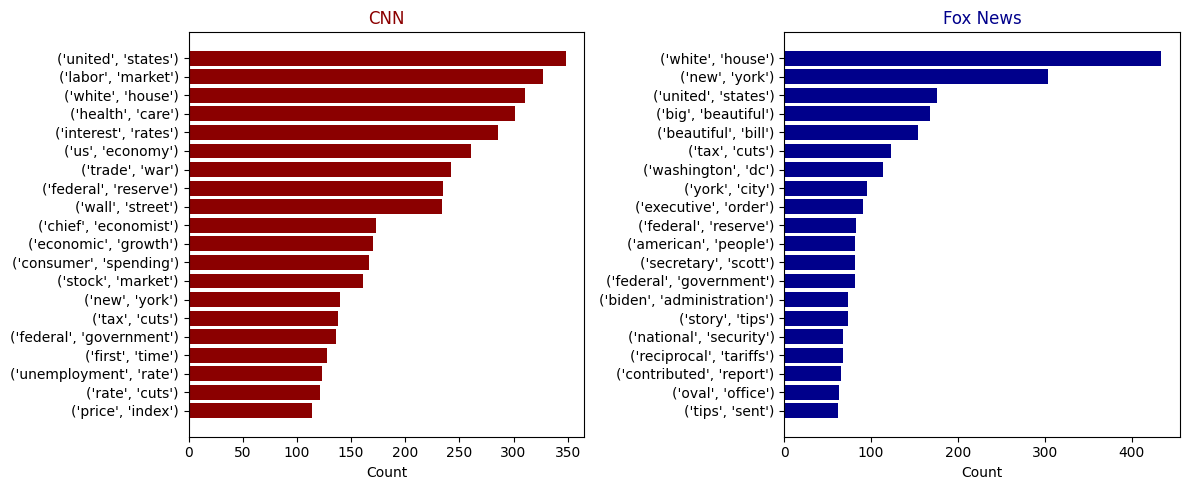

In [240]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
#CNN
axes[0].barh(cnn_top["bigram"].astype(str), cnn_top["count"], color = "darkred")
axes[0].invert_yaxis()
axes[0].set_xlabel("Count")
axes[0].set_title("CNN", color = "darkred")
#Fox
axes[1].barh(fox_top["bigram"].astype(str), fox_top["count"], color = "darkblue")
axes[1].invert_yaxis()
axes[1].set_xlabel("Count")
axes[1].set_title("Fox News", color = "darkblue")

plt.tight_layout()
plt.savefig(r"C:\Users\Enkhsaikhan\Final_paper_text_as_data\output\bigrams.png")

In [241]:
# Flatten all bigrams across documents
all_bigrams = [bg for doc in df['bigrams'] for bg in doc]

# Count bigrams
bigram_counts = Counter(all_bigrams)

MIN_COUNT = 20

bigram_counts = {
    bg: c for bg, c in bigram_counts.items()
    if c >= MIN_COUNT
}

Compute log odds ratio for bigrams

In [242]:
from itertools import chain

cnn = df[df["source"] == "CNN"]
fox = df[df["source"] == "Fox News"]

cnn_counts = Counter(chain.from_iterable(cnn["bigrams"]))
fox_counts = Counter(chain.from_iterable(fox["bigrams"]))

cnn_total = sum(cnn_counts.values())
fox_total = sum(fox_counts.values())

MIN_COUNT = 20

filtered_bigrams = {
    bg for bg in (set(cnn_counts) | set(fox_counts))
    if (cnn_counts.get(bg, 0) + fox_counts.get(bg, 0)) >= MIN_COUNT
}

rows = []
for bg in filtered_bigrams:
    c_cnn = cnn_counts.get(bg, 0)
    c_fox = fox_counts.get(bg, 0)

    log_odds = np.log(
        ((c_cnn + 1) / (cnn_total + 1)) /
        ((c_fox + 1) / (fox_total + 1))
    )

    rows.append({
        "bigram": " ".join(bg),
        "log_odds": log_odds,
        "cnn_freq": c_cnn,
        "fox_freq": c_fox
    })

logodds_df = pd.DataFrame(rows)

Selecting top 20 bigrams for outlets

In [243]:
top_cnn = (
    logodds_df
    .sort_values("log_odds", ascending=False)
    .head(20)
)

top_fox = (
    logodds_df
    .sort_values("log_odds")
    .head(20)
)

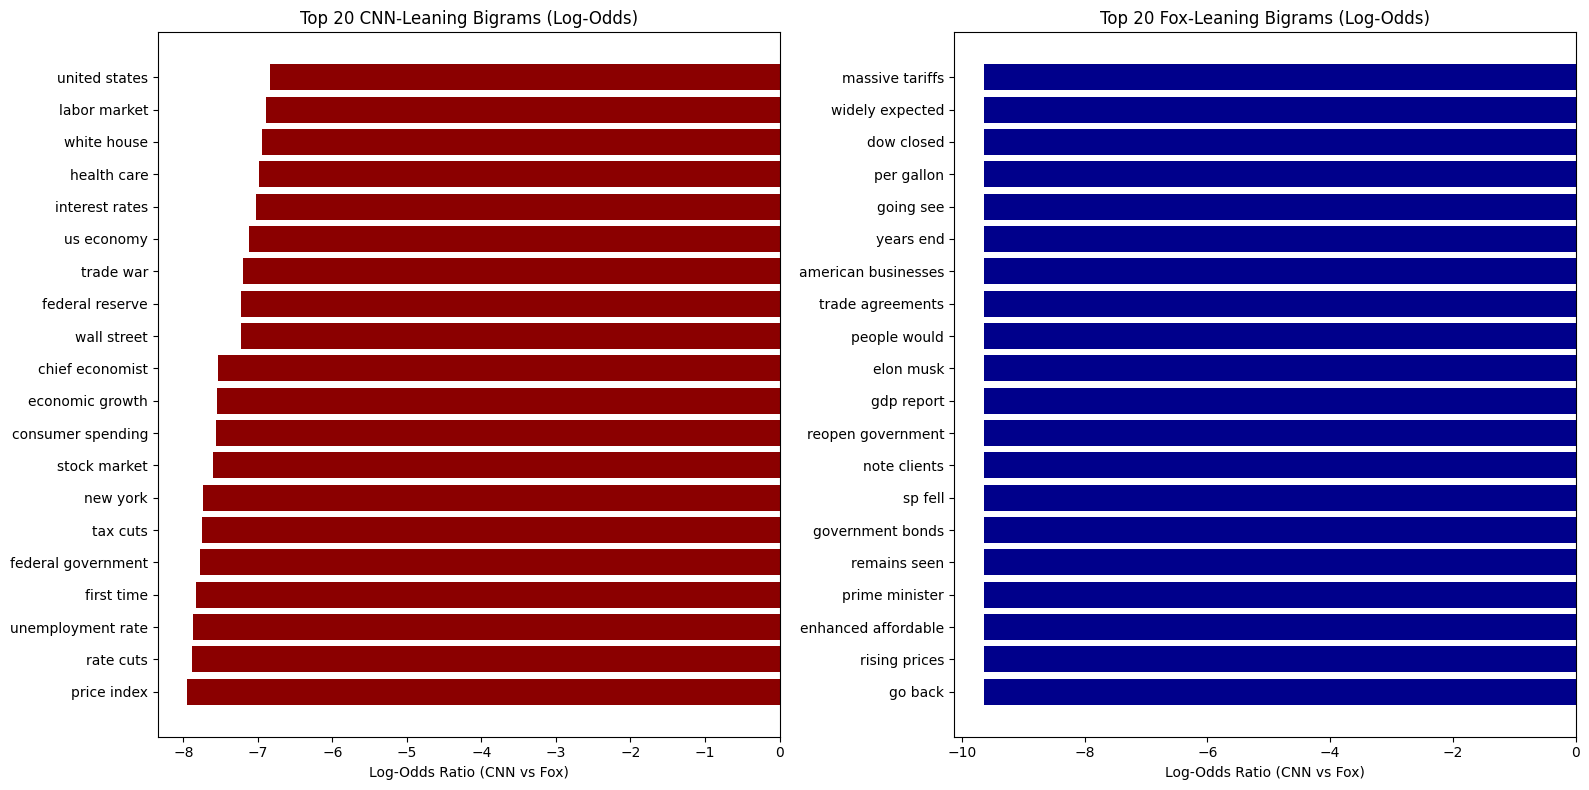

In [244]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# CNN-leaning
axes[0].barh(top_cnn["bigram"], top_cnn["log_odds"], color="darkred")
axes[0].invert_yaxis()
axes[0].set_title("Top 20 CNN-Leaning Bigrams (Log-Odds)")
axes[0].set_xlabel("Log-Odds Ratio (CNN vs Fox)")

# Fox-leaning
axes[1].barh(top_fox["bigram"], top_fox["log_odds"], color="darkblue")
axes[1].invert_yaxis()
axes[1].set_title("Top 20 Fox-Leaning Bigrams (Log-Odds)")
axes[1].set_xlabel("Log-Odds Ratio (CNN vs Fox)")

plt.tight_layout()
plt.show()

In [254]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification")
text = "US GDP grew 3% in Q4 2025."
candidate_labels = ["GDP", "Inflation", "Tax", "Trade War"]
result = classifier(text, candidate_labels)
print(result)

ModuleNotFoundError: No module named 'transformers'

___

### <span style="color:blue"><b>Task 3: Sentiment analysis</b></span>

In [245]:
# Step 1: Initialize AFINN sentiment analyzer
afinn = Afinn()

def compute_sentiment(text):
    tokens = [w.lower() for w in word_tokenize(text) if w.isalpha() and w not in stop_words]
    if len(tokens) == 0:
        return 0
    scores = [afinn.score(w) for w in tokens]
    avg_sentiment = sum(scores) / len(tokens)
    return avg_sentiment

# Step 3: Apply sentiment analysis
df['sentiment'] = df['clean_text'].apply(compute_sentiment)

In [246]:
df.groupby("source")['sentiment'].describe()

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
CNN,646.0,0.010240,0.052251,-0.191176,-0.018225,0.012752,0.041465,0.172638
Fox,423.0,0.013717,0.067118,-0.271386,-0.024606,0.019763,0.054182,0.244552


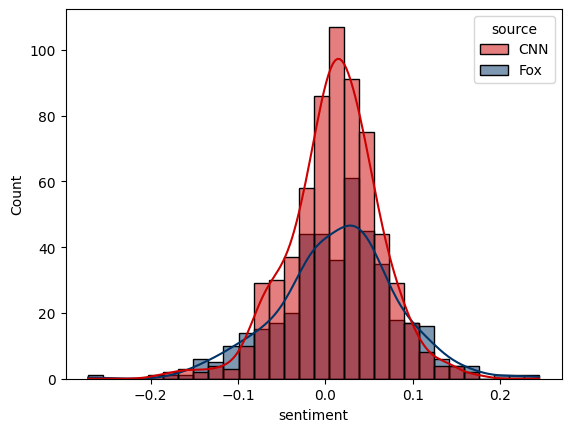

In [247]:
sns.histplot(
    data = df,
    x = "sentiment",
    hue = "source",
    bins = 30,
    kde = True,
    palette={"CNN":"#CC0000", "Fox":"#003366"}
)
plt.savefig(r"C:\Users\Enkhsaikhan\Final_paper_text_as_data\output\dist.png", dpi = 300)

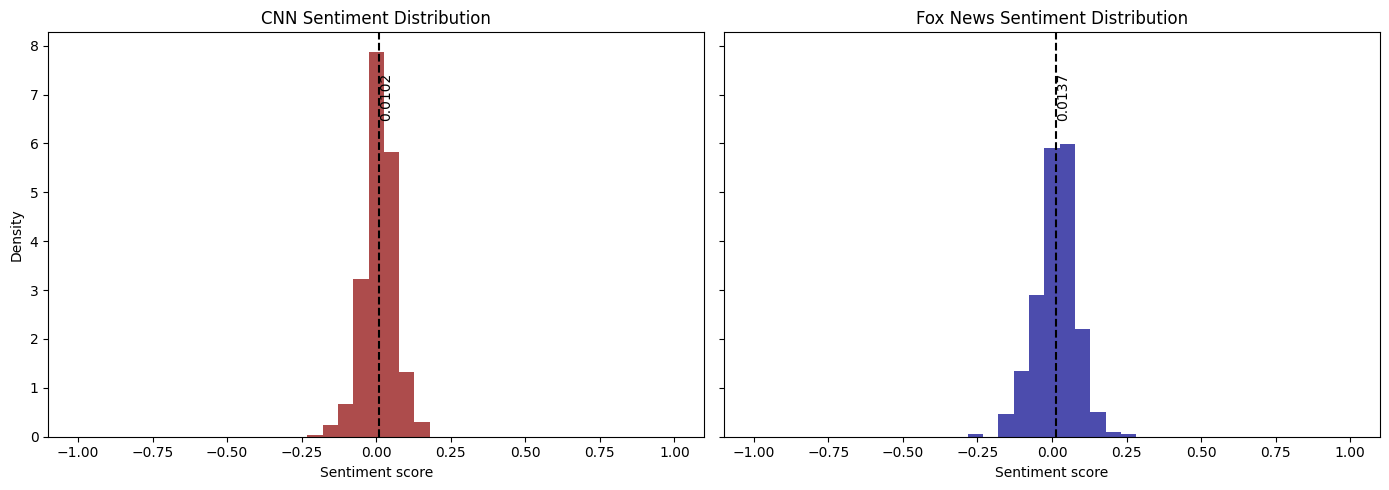

<Figure size 640x480 with 0 Axes>

In [248]:
cnn_diff = df[df["source"]=="CNN"]
fox_diff = df[df["source"]=="Fox"]

bins = np.linspace(-1, 1, 40)

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# CNN histogram
axes[0].hist(cnn_diff.sentiment, bins=bins, density=True, alpha=0.7, color='darkred')
cnn_mean = cnn_diff.sentiment.mean()
axes[0].axvline(cnn_mean, color='black', linestyle='--')
axes[0].text(cnn_mean, axes[0].get_ylim()[1]*0.9, f'{cnn_mean:.4f}', rotation=90, verticalalignment='top')
axes[0].set_title("CNN Sentiment Distribution")
axes[0].set_xlabel("Sentiment score")
axes[0].set_ylabel("Density")

# Fox histogram
axes[1].hist(fox_diff.sentiment, bins=bins, density=True, alpha=0.7, color='darkblue')
fox_mean = fox_diff.sentiment.mean()
axes[1].axvline(fox_mean, color='black', linestyle='--')
axes[1].text(fox_mean, axes[1].get_ylim()[1]*0.9, f'{fox_mean:.4f}', rotation=90, verticalalignment='top')
axes[1].set_title("Fox News Sentiment Distribution")
axes[1].set_xlabel("Sentiment score")

plt.tight_layout()
plt.show()
plt.savefig(r"C:\Users\Enkhsaikhan\Final_paper_text_as_data\output\dist2.png", dpi = 300)

In [249]:
df["date"] = pd.to_datetime(df["date"], format = "mixed")
df['month'] = df["date"].dt.month

In [250]:
df

,title,date,body,link,source,clean_text,bigrams,sentiment,month
0,The US economy expanded at the fastest pace in...,2025-12-23,An initial reading of third-quarter gross dome...,https://www.cnn.com/2025/12/23/economy/us-gdp-q3,CNN,an initial reading of thirdquarter gross domes...,"[(initial, reading), (reading, thirdquarter), ...",0.087838,12
1,"Inflation cooled in November to 2.7%, but econ...",2025-12-18,Inflation unexpectedly – and sharply – slowed ...,https://www.cnn.com/2025/12/18/economy/us-cpi-...,CNN,inflation unexpectedly and sharply slowed in...,"[(inflation, unexpectedly), (unexpectedly, sha...",0.010941,12
2,The No. 1 cause of America’s affordability pro...,2025-12-16,America’scost-of-living problemis simple math:...,https://www.cnn.com/2025/12/16/economy/afforda...,CNN,americascostofliving problemis simple math inf...,"[(americascostofliving, problemis), (problemis...",0.060241,12
3,The solution to America’s affordability proble...,2025-12-15,The best way to fix Americans’ cost-of-living ...,https://www.cnn.com/2025/12/15/economy/afforda...,CNN,the best way to fix americans costofliving pro...,"[(best, way), (way, fix), (fix, americans), (a...",0.050228,12
4,Analysis: How the White House is using mislead...,2025-12-11,"The year-over-yearinflation ratein January, th...",https://www.cnn.com/2025/12/11/politics/inflat...,CNN,the yearoveryearinflation ratein january the m...,"[(yearoveryearinflation, ratein), (ratein, jan...",-0.014205,12
...,...,...,...,...,...,...,...,...,...
2872,15% corporate tax rate and 25% small business ...,2025-03-04,‘America Reports’ panelists Meghan Hays and Da...,https://www.foxnews.com/opinion/15-corporate-t...,Fox,america reports panelists meghan hays and davi...,"[(america, reports), (reports, panelists), (pa...",0.032710,3
2873,Major Trump tariff move likely to benefit this...,2025-03-04,Podcast host Josh Holmes weighs in after Presi...,https://www.foxnews.com/politics/major-trump-t...,Fox,podcast host josh holmes weighs in after donal...,"[(podcast, host), (host, josh), (josh, holmes)...",0.095975,3
2874,New York prison guards fired for ignoring deal...,2025-03-04,Fox News Flash top headlines are here. Check o...,https://www.foxnews.com/us/new-york-prison-gua...,Fox,fox news flash top headlines are here check ou...,"[(flash, top), (top, headlines), (headlines, c...",-0.135940,3
2875,ICE arrest of migrant sparks anger protest bef...,2025-03-01,Fox News correspondent Todd Piro and the ‘Fox ...,https://www.foxnews.com/us/ice-arrest-migrant-...,Fox,fox news correspondent todd piro and the fox ...,"[(correspondent, todd), (todd, piro), (friends...",-0.071101,3


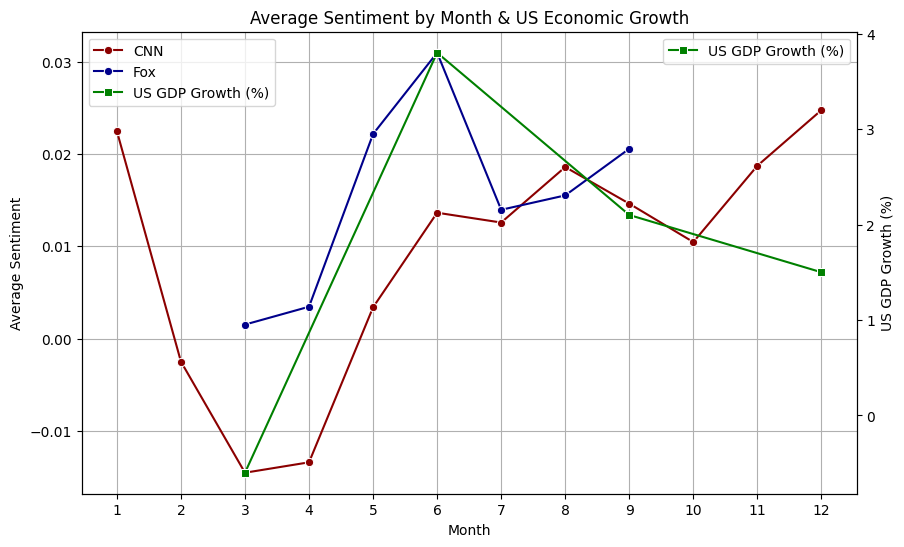

In [251]:
# Aggregate sentiment by month and source
monthly_sentiment = df.groupby(['month', 'source'])['sentiment'].mean().reset_index()

# Define custom colors
custom_palette = {"CNN": "darkred", "Fox": "darkblue"}

# Example U.S. economic growth per quarter
# We'll map it roughly to months: Q1 -> Mar, Q2 -> Jun, Q3 -> Sep, Q4 -> Dec
growth_data = pd.DataFrame({
    'month': [3, 6, 9, 12],
    'GDP_growth': [-0.6, 3.8, 2.1, 1.5]  # Replace with your Q3/Q4 numbers
})

# Plot sentiment
fig, ax1 = plt.subplots(figsize=(10,6))

sns.lineplot(
    data=monthly_sentiment,
    x='month',
    y='sentiment',
    hue='source',
    marker='o',
    palette=custom_palette,
    ax=ax1
)
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Sentiment')
ax1.set_xticks(range(1,13))
ax1.grid(True)

# Plot GDP growth on secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(
    data=growth_data,
    x='month',
    y='GDP_growth',
    color='green',
    marker='s',
    ax=ax2,
    label='US GDP Growth (%)'
)
ax2.set_ylabel('US GDP Growth (%)')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Average Sentiment by Month & US Economic Growth')
plt.show()